In [114]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

## Подключение к базе данных

In [115]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

## Анализировать только пользователей, а не администраторов, учитывать только логи из таблицы проверки, где статус готов

In [116]:
query = '''
SELECT
    uid,
    timestamp,
    COUNT(*) AS commits
FROM
    checker
WHERE
    status = 'ready'
    AND uid LIKE 'user_%'
    AND labname = 'project1'
GROUP BY
    uid, timestamp
'''
df = pd.read_sql(query, conn)

In [117]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.sort_values(by=['uid','timestamp'], inplace=True)
df['cumulative_commits'] = df.groupby('uid')['commits'].cumsum()

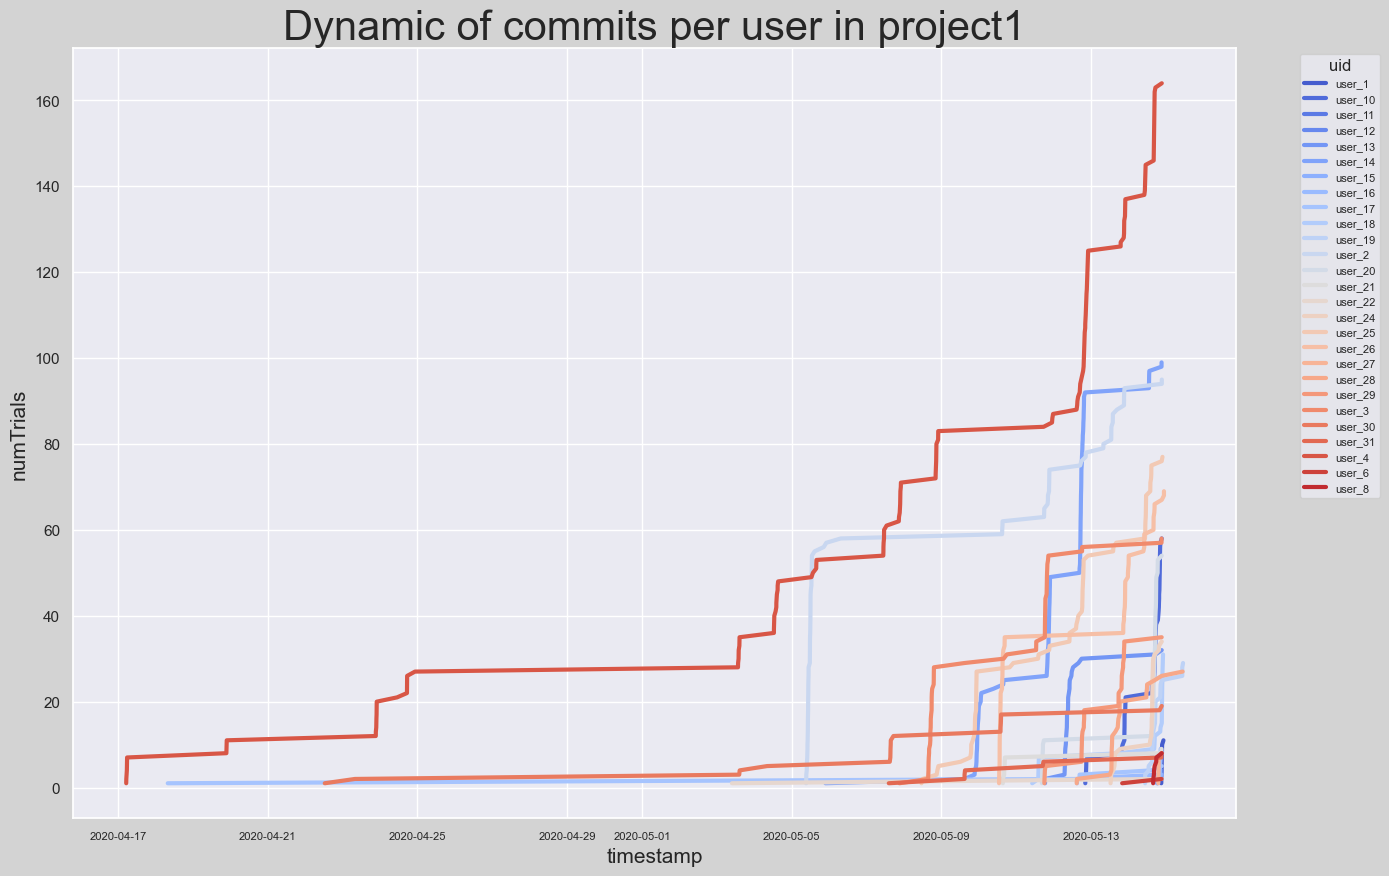

In [118]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15,10))
sns.lineplot(
    data=df,
    x="timestamp",
    y="cumulative_commits",
    hue="uid",
    linewidth=3,
    palette="coolwarm"
)

plt.title("Dynamic of commits per user in project1", fontsize=30)
plt.xticks(fontsize=8)
plt.xlabel("timestamp", fontsize=15)
plt.ylabel("numTrials", fontsize=15)
plt.legend(title="uid", bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 8})
plt.gcf().set_facecolor('lightgray')

## Закрыть соеденения

In [119]:
conn.close()

## «Какой пользователь лидировал по количеству коммитов почти всегда?»
user_4
## «Какой пользователь был лидером только короткий период времени?»
user_2